# 1. Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# 2. Load the dataset

In [2]:
df = pd.read_csv('cancer_patient_datasets.csv')
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


# 3. Data cleaning (handling missing values, etc.)

In [3]:
df.shape

(1000, 26)

In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

# 4. Exploratory Data Analysis (EDA)
### Example pivot_table: Analyze survival rates by cancer stage and smoking status

## #1 Pivot and plot

In [7]:
pivot1 = pd.pivot_table(df, values='Level',
                        index='Smoking', 
                        columns='Passive Smoker', 
                        aggfunc='count')
print(pivot1)

Passive Smoker     1      2     3     4     5     6      7     8
Smoking                                                         
1               10.0   80.0   NaN  81.0  10.0   NaN    NaN   NaN
2               30.0   72.0  80.0  30.0  10.0   NaN    NaN   NaN
3               10.0  102.0  30.0  30.0   NaN   NaN    NaN   NaN
4                NaN   10.0  30.0   NaN   NaN   NaN    NaN  19.0
5                NaN    NaN   NaN  10.0   NaN   NaN    NaN   NaN
6               10.0   10.0   NaN  10.0   NaN  20.0    NaN  10.0
7                NaN   10.0   NaN   NaN   NaN  10.0  108.0  79.0
8                NaN    NaN   NaN   NaN  10.0   NaN   79.0   NaN


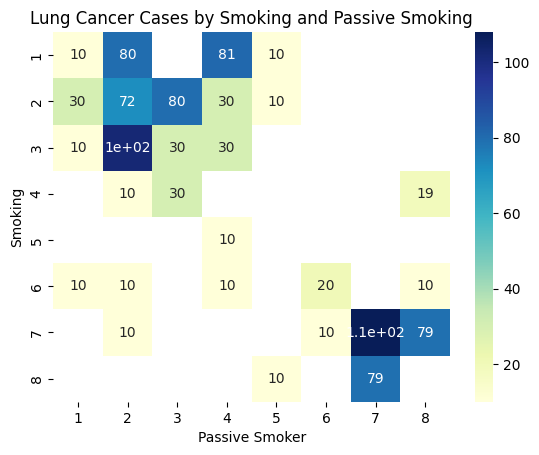

In [8]:
sns.heatmap(pivot1, annot=True, cmap="YlGnBu")
plt.title('Lung Cancer Cases by Smoking and Passive Smoking')
plt.show()

## #2 Pivot and plot

In [9]:
pivot2 = pd.pivot_table(df, values='Age', 
                        index='Gender', 
                        columns='Level', 
                        aggfunc='mean')
print(pivot2)

Level        High        Low     Medium
Gender                                 
1       39.257937  40.765101  37.827411
2       33.000000  30.233766  39.777778


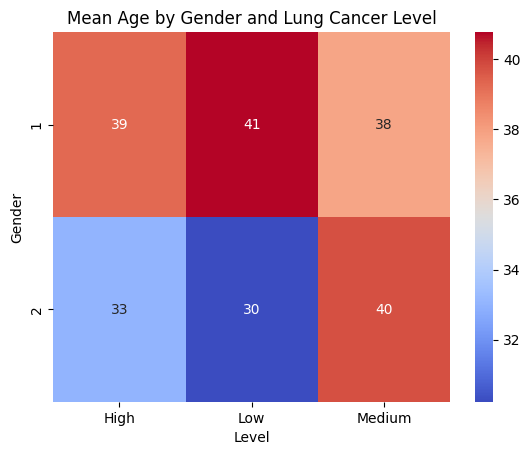

In [10]:
sns.heatmap(pivot2, annot=True, cmap="coolwarm")
plt.title('Mean Age by Gender and Lung Cancer Level')
plt.show()

## #3 Pivot and plot

In [11]:
pivot3 = pd.pivot_table(df, values='Dust Allergy', 
                        index='Level', 
                        columns='Obesity', 
                        aggfunc='mean')
print(pivot3)

Obesity         1    2         3         4    5    6         7
Level                                                         
High          NaN  NaN  7.000000  2.000000  NaN  5.0  6.785276
Low      2.142857  3.2  3.444444  3.688525  NaN  NaN       NaN
Medium        NaN  6.5  3.598039  6.166667  6.0  5.5  7.000000


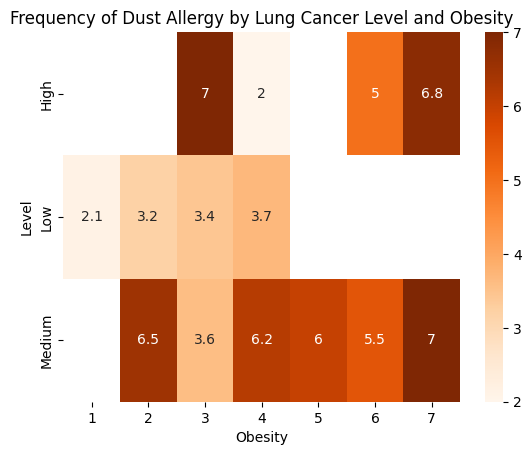

In [12]:
sns.heatmap(pivot3, annot=True, cmap="Oranges")
plt.title('Frequency of Dust Allergy by Lung Cancer Level and Obesity')
plt.show()

## #4 Pivot and plot

In [13]:
pivot4 = pd.pivot_table(df, values='Chest Pain', 
                        index='Smoking', 
                        columns='Level', 
                        aggfunc='mean')
print(pivot4)

Level        High       Low    Medium
Smoking                              
1             NaN  3.000000  3.166667
2        4.000000  2.395062  3.000000
3             NaN  2.140845  4.188119
4        7.000000  4.750000       NaN
5             NaN       NaN  6.000000
6        7.000000  3.666667  6.000000
7        6.732620  1.500000       NaN
8        7.481013       NaN  5.000000


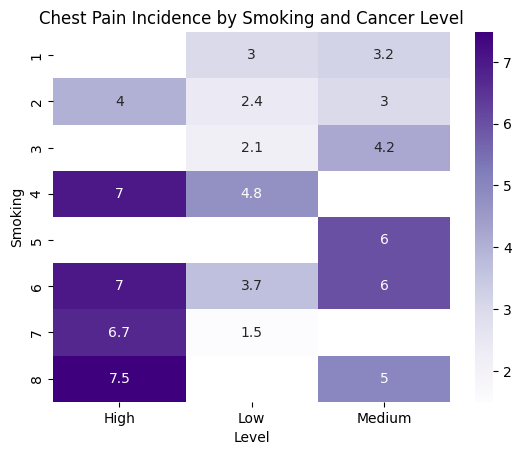

In [14]:
sns.heatmap(pivot4, annot=True, cmap="Purples")
plt.title('Chest Pain Incidence by Smoking and Cancer Level')
plt.show()

## #5 Pivot and plot

In [15]:
pivot5 = pd.pivot_table(df, values='Air Pollution', 
                        index='Genetic Risk', 
                        columns='Level', 
                        aggfunc='mean')
print(pivot5)

Level             High       Low    Medium
Genetic Risk                              
1                  NaN  2.750000       NaN
2                  NaN  2.752066  1.549451
3                  NaN  2.445652  2.259259
4                  NaN  1.500000  2.500000
5             4.250000       NaN  3.000000
6             5.705882  3.500000  4.500000
7             6.221198  2.000000  4.500000


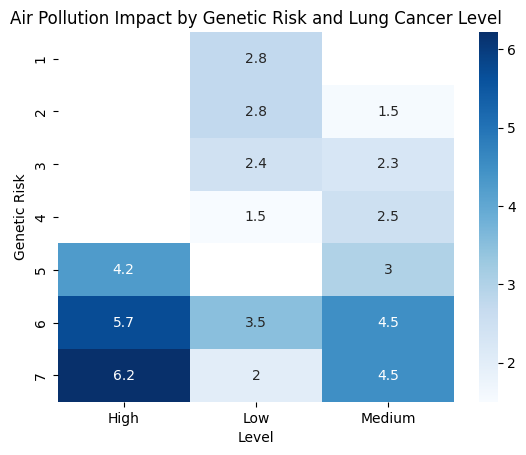

In [16]:
sns.heatmap(pivot5, annot=True, cmap="Blues")
plt.title('Air Pollution Impact by Genetic Risk and Lung Cancer Level')
plt.show()

## #6 Pivot and plot

In [17]:
pivot6 = pd.pivot_table(df, values='Alcohol use', 
                        index='Chest Pain', 
                        columns='Level', 
                        aggfunc='mean')
print(pivot6)

Level           High       Low    Medium
Chest Pain                              
1                NaN  2.000000       NaN
2           4.000000  2.765432  2.666667
3                NaN  1.655738  2.000000
4           5.000000  1.487805  7.375000
5                NaN       NaN  6.000000
6                NaN  1.000000  4.666667
7           7.334586  4.000000       NaN
8                NaN       NaN  6.000000
9           8.000000       NaN       NaN


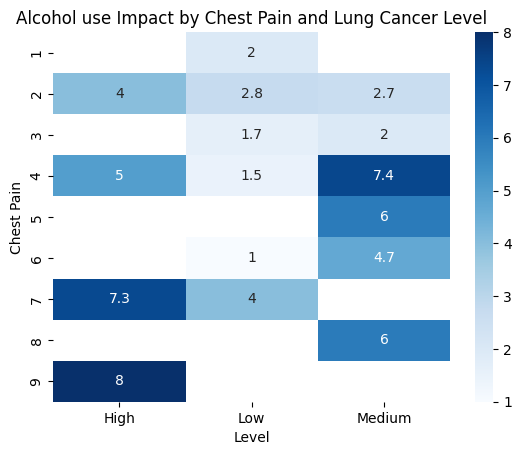

In [18]:
sns.heatmap(pivot6, annot=True, cmap="Blues")
plt.title('Alcohol use Impact by Chest Pain and Lung Cancer Level')
plt.show()

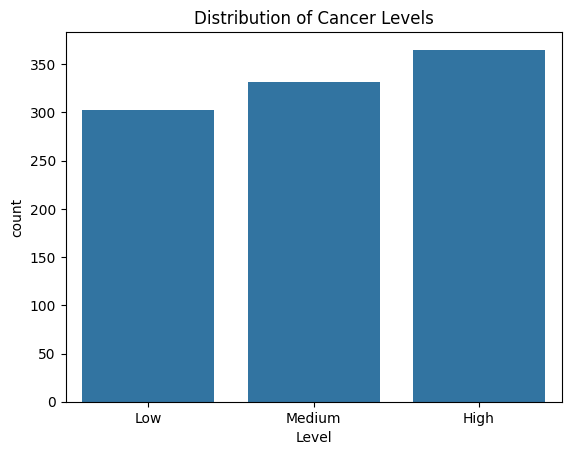

In [19]:
sns.countplot(x='Level', data=df)
plt.title('Distribution of Cancer Levels')
plt.show()

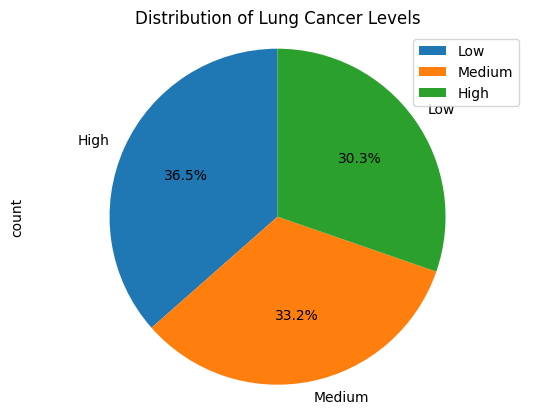

In [20]:
df['Level'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Lung Cancer Levels')
plt.legend(df['Level'].unique())
plt.show()

In [21]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [22]:
correlation_matrix = df_encoded.corr()

In [23]:
print(correlation_matrix)

                    index       Age    Gender  Air Pollution  Alcohol use  \
index            1.000000  0.002674 -0.025739       0.053307     0.041374   
Age              0.002674  1.000000 -0.202086       0.099494     0.151742   
Gender          -0.025739 -0.202086  1.000000      -0.246912    -0.227636   
Air Pollution    0.053307  0.099494 -0.246912       1.000000     0.747293   
Alcohol use      0.041374  0.151742 -0.227636       0.747293     1.000000   
...                   ...       ...       ...            ...          ...   
Patient Id_P997  0.054526 -0.032099  0.038588       0.002494     0.005279   
Patient Id_P998  0.054635 -0.050555  0.038588       0.033675     0.041518   
Patient Id_P999  0.054745  0.025908 -0.025941       0.033675     0.005279   
Level_Low       -0.053425 -0.096786  0.142881      -0.402653    -0.587038   
Level_Medium     0.004318  0.084983  0.006652      -0.314827    -0.098031   

                 Dust Allergy  OccuPational Hazards  Genetic Risk  \
index 

In [24]:
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation between Features')
# plt.show()

## Apply label encoder to target variable

In [25]:
lb = LabelEncoder()

In [26]:
df['Level_Encoded'] = lb.fit_transform(df['Level'])
df['Level_Encoded'].dtypes

dtype('int32')

# 5. Split data into training and testing sets

In [27]:
x = df.drop('Level_Encoded', axis=1)
y = df['Level_Encoded']

In [28]:
for column in x.columns:
    if x[column].dtype == 'object':
        x[column] = lb.fit_transform(x[column])

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state = 42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(750, 26)
(250, 26)
(750,)
(250,)


## 6. Model 1: Decision Tree Classifier

In [30]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy_clf = accuracy_score(y_test, y_pred)

## 7. Model 2: Logistic Regression

In [31]:
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

C:\Users\mrbis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 8. Model 3: KNeighbors Classifier

In [32]:
knb = KNeighborsClassifier()
knb.fit(x_train,y_train)
y_pred_knb = knb.predict(x_test)
accuracy_knb = accuracy_score(y_test, y_pred_knb)

## #These 3 Models Accuracy Score

In [33]:
model_predict = [
    f"Decision Tree Accuracy {accuracy_clf}",
    f"Logistic Regression {accuracy_lr}",
    f"KNeighbors Classifier {accuracy_knb}",
]
print(model_predict)

['Decision Tree Accuracy 1.0', 'Logistic Regression 1.0', 'KNeighbors Classifier 0.804']


# 9. Confusion Matrix for all models

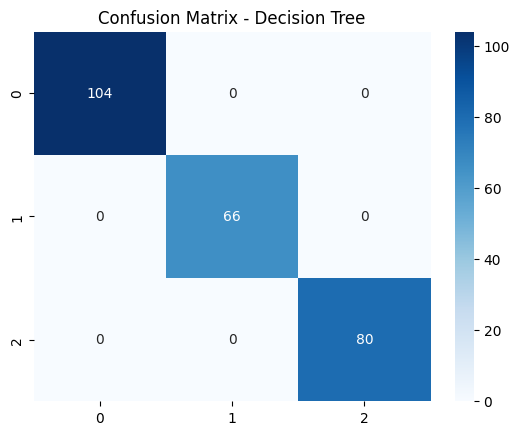

In [34]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

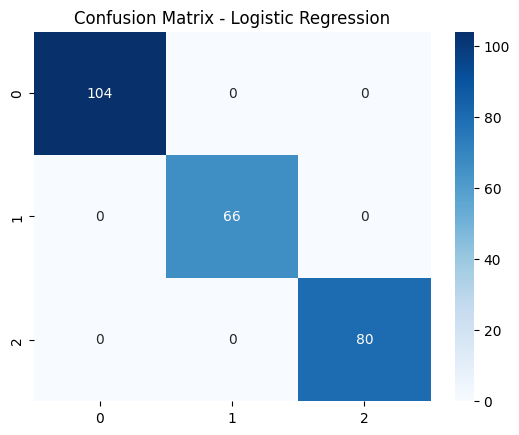

In [35]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

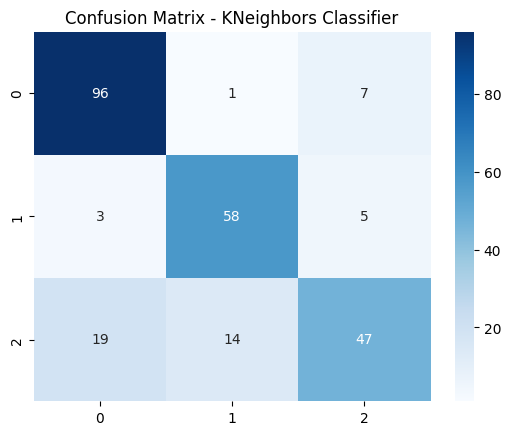

In [36]:
cm_lr = confusion_matrix(y_test, y_pred_knb)
sns.heatmap(cm_lr, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix - KNeighbors Classifier')
plt.show()

# 10. Classification Report for all Models

In [37]:
print("Decision Tree\n\n\n",classification_report(y_test, y_pred))
print("Logistic Regression\n\n\n",classification_report(y_test, y_pred_lr))
print("KNeighbors Classifier\n\n\n",classification_report(y_test, y_pred_knb))

Decision Tree


               precision    recall  f1-score   support

           0       1.00      1.00      1.00       104
           1       1.00      1.00      1.00        66
           2       1.00      1.00      1.00        80

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250

Logistic Regression


               precision    recall  f1-score   support

           0       1.00      1.00      1.00       104
           1       1.00      1.00      1.00        66
           2       1.00      1.00      1.00        80

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250

KNeighbors Classifier


               precision    recall  f1-score   support

           0       0.81      0.92      0.86       104
           1       0.79      0.88      0.83        66
          